### 인공신경망 학습 예제

In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from torchviz import make_dot

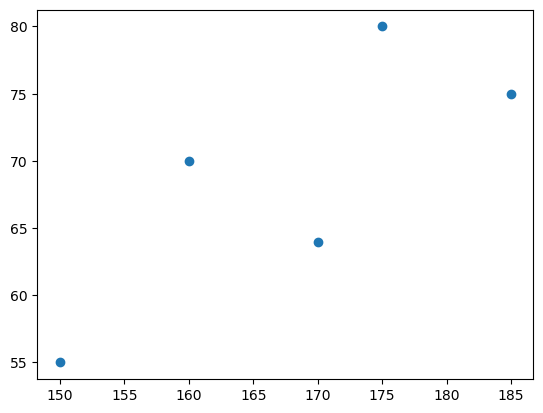

In [6]:
x = torch.tensor([150, 160, 170, 175 ,185.]) # 키
y = torch.tensor([55, 70, 64, 80, 75.]) # 몸무게
N = len(x)
plt.plot(x,y,'o')

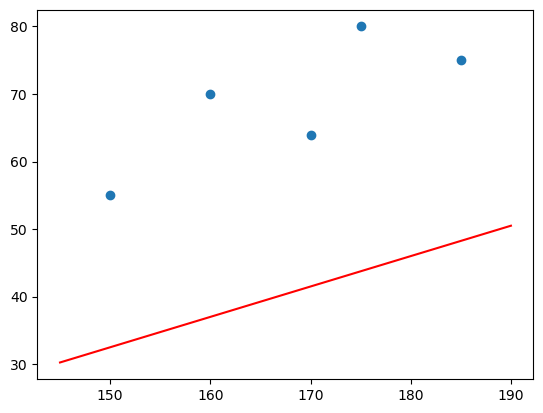

In [7]:
# 초깃값 설정
a = 0.45
b = -35
x_plot = torch.linspace(145, 190, 100)
y_plot = a*x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

<Figure size 640x480 with 0 Axes>

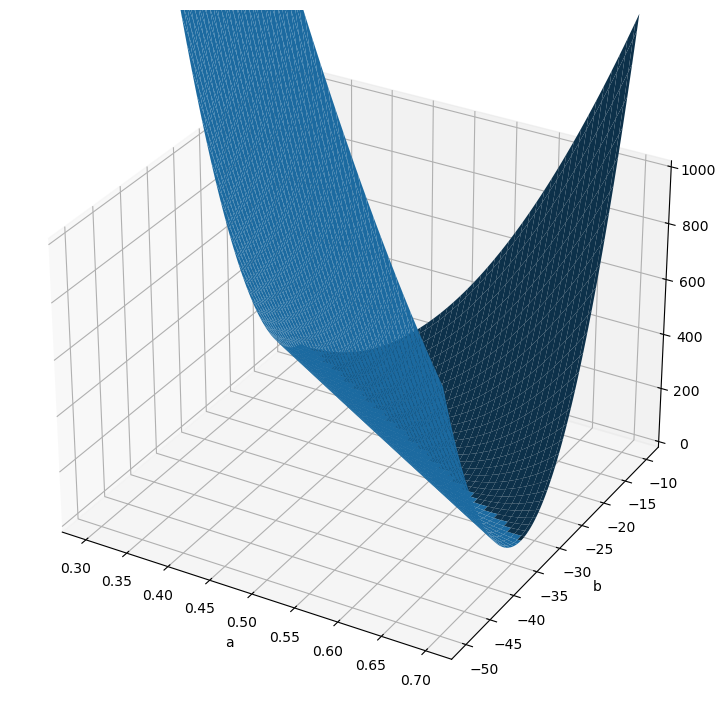

<Figure size 640x480 with 0 Axes>

In [13]:
# a, b 를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a,b 선정

a = 0.5 + torch.linspace(-0.2,0.2,100)
b = -30 + torch.linspace(-20,20, 100)

L = torch.zeros(len(b), len(a))
for i in range(len(b)):
    for j in range(len(a)):
        for n in range(N):
            L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i]))**2

L = L/N # MSE

plt.figure(figsize=[10,9])
ax = plt.axes(projection="3d")
A, B = torch.meshgrid(a,b)
ax.plot_surface(A,B,L)
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0,1000])

plt.figure()

In [15]:
print(L)

tensor([[4717.8999, 4625.1914, 4533.4097,  ...,   37.8939,   35.0339,
           33.1000],
        [4662.7900, 4570.6304, 4479.3970,  ...,   35.9905,   33.6789,
           32.2935],
        [4608.0068, 4516.3955, 4425.7109,  ...,   34.4135,   32.6504,
           31.8136],
        ...,
        [ 892.4518,  852.9494,  814.3732,  ..., 1373.4280, 1423.7732,
         1475.0457],
        [ 869.0127,  830.0588,  792.0311,  ..., 1403.1949, 1454.0889,
         1505.9099],
        [ 845.8998,  807.4945,  770.0153,  ..., 1433.2881, 1484.7303,
         1537.1000]])


In [17]:
print(torch.min(L))
a_opt = A[L==torch.min(L)]
b_opt = B[L==torch.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

tensor(29.0315)
optimal a = tensor([0.5424])
optimal b = tensor([-23.7374])


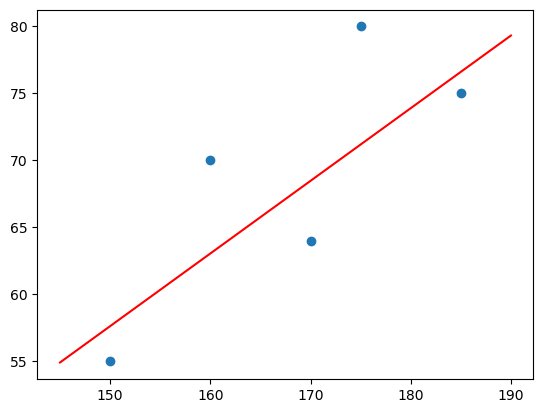

In [18]:
x_plot = torch.linspace(145, 190, 100)
y_plot = a_opt*x_plot + b_opt
plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

### gradient descent

epoch: 1 loss: 826.2250
Weight: 0.4785, Bias: -34.9998


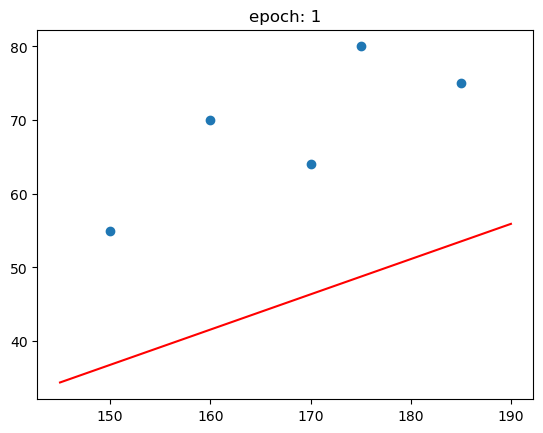

epoch: 2 loss: 578.0414
Weight: 0.5022, Bias: -34.9997


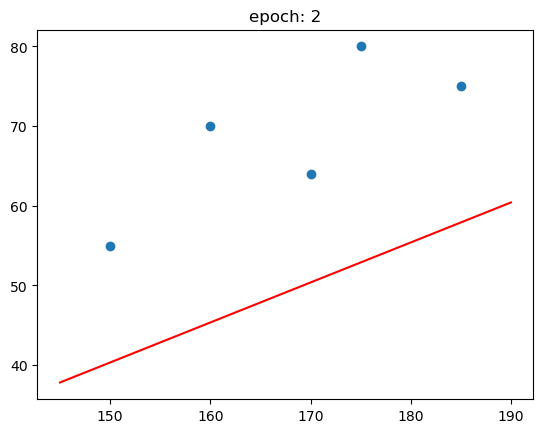

epoch: 3 loss: 407.1602
Weight: 0.5218, Bias: -34.9996


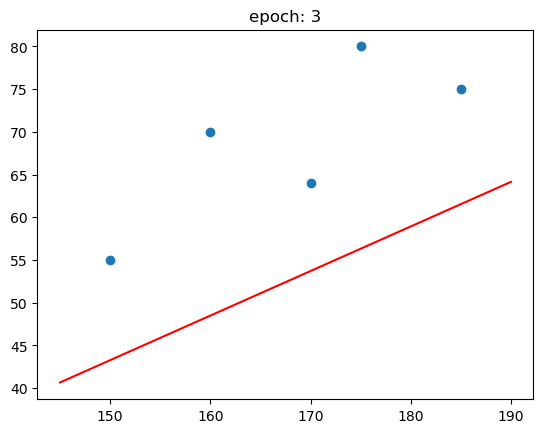

epoch: 4 loss: 289.5042
Weight: 0.5381, Bias: -34.9995


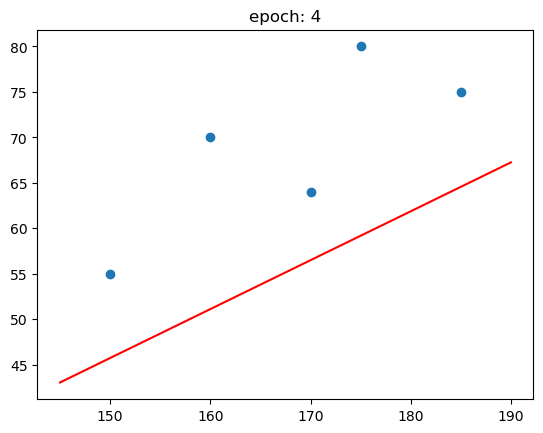

epoch: 5 loss: 208.4954
Weight: 0.5517, Bias: -34.9994


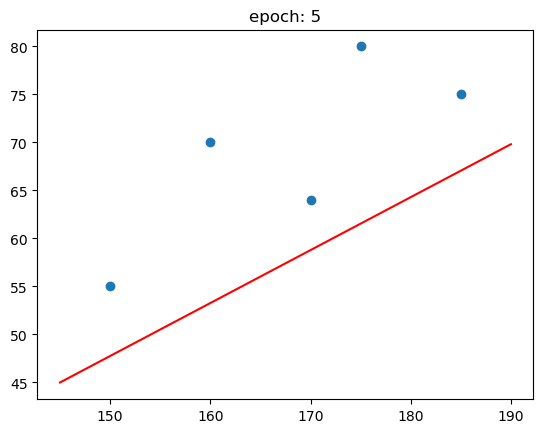

epoch: 6 loss: 152.7187
Weight: 0.5629, Bias: -34.9993


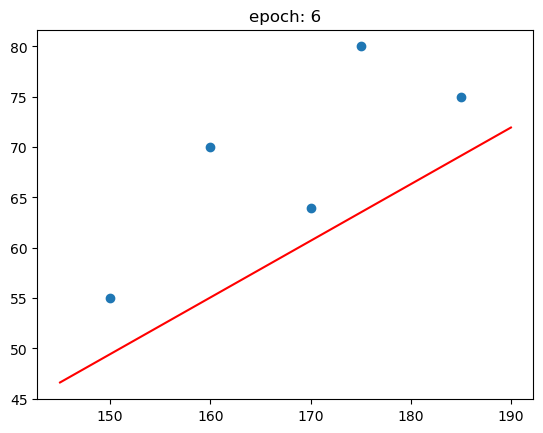

epoch: 7 loss: 114.3153
Weight: 0.5722, Bias: -34.9993


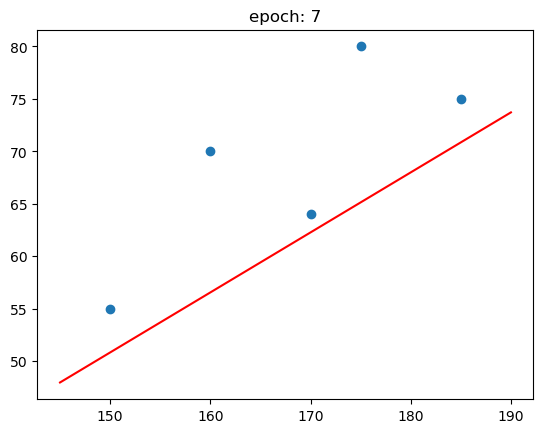

epoch: 8 loss: 87.8735
Weight: 0.5799, Bias: -34.9992


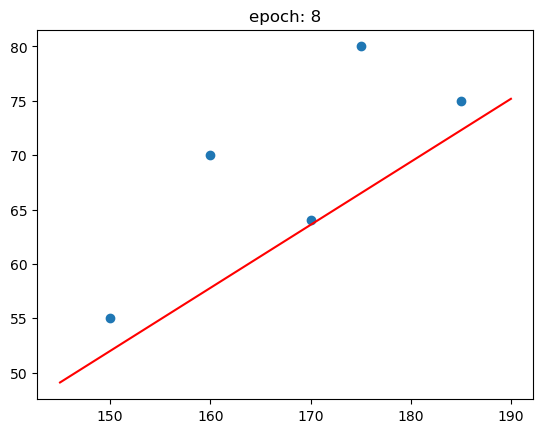

epoch: 9 loss: 69.6676
Weight: 0.5863, Bias: -34.9992


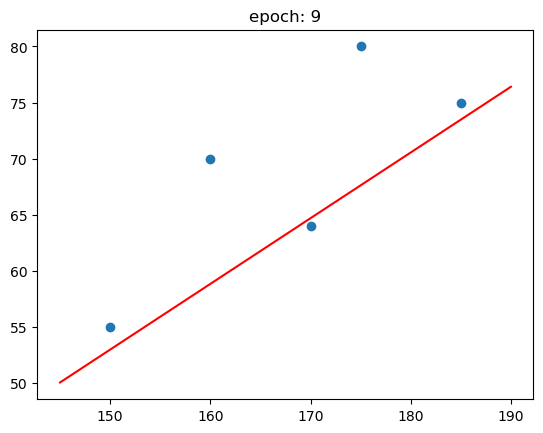

epoch: 10 loss: 57.1324
Weight: 0.5917, Bias: -34.9992


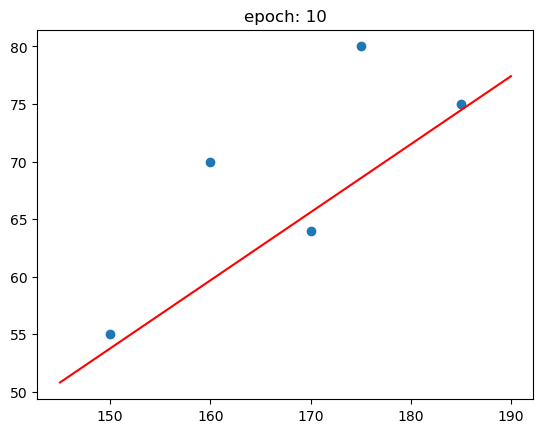

epoch: 11 loss: 48.5017
Weight: 0.5961, Bias: -34.9991


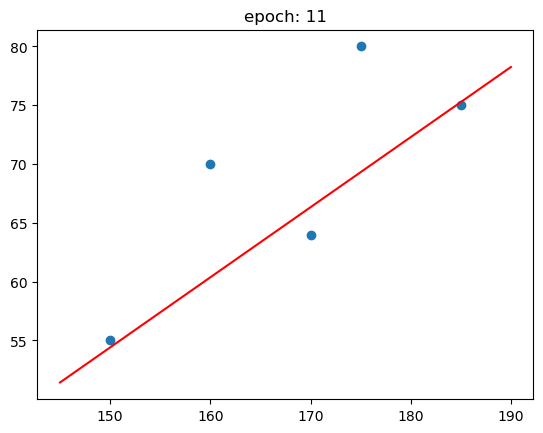

epoch: 12 loss: 42.5591
Weight: 0.5997, Bias: -34.9991


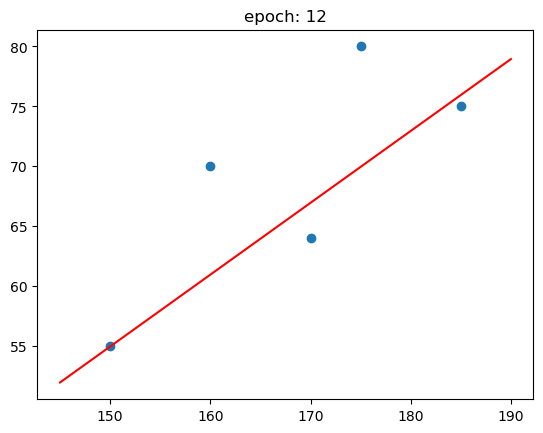

epoch: 13 loss: 38.4676
Weight: 0.6028, Bias: -34.9991


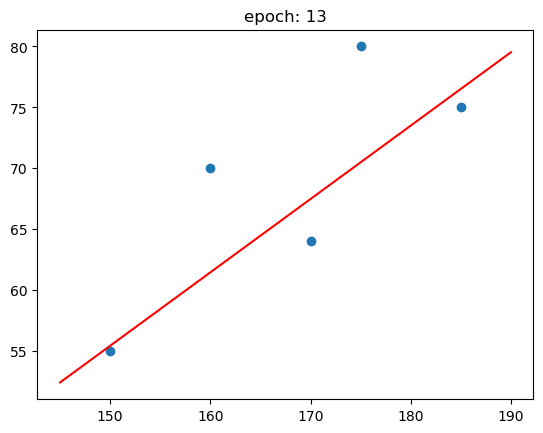

epoch: 14 loss: 35.6504
Weight: 0.6053, Bias: -34.9991


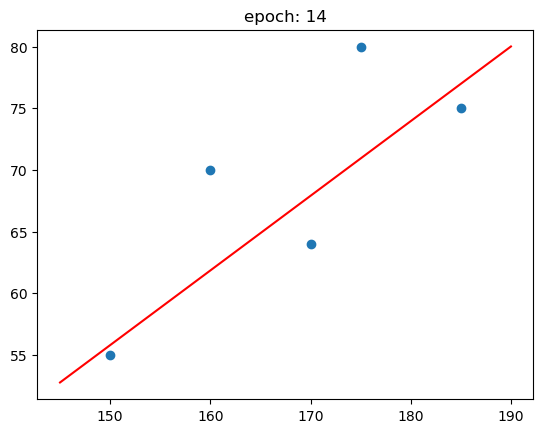

epoch: 15 loss: 33.7107
Weight: 0.6074, Bias: -34.9991


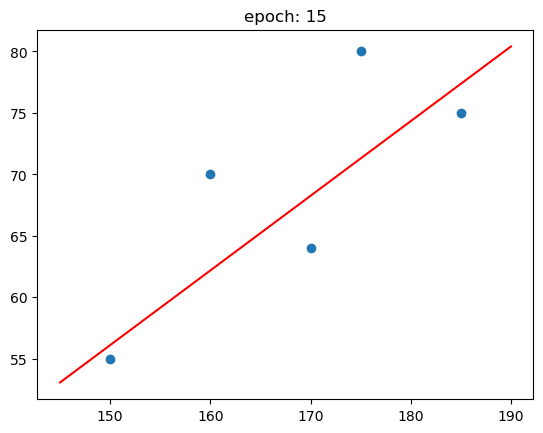

epoch: 16 loss: 32.3752
Weight: 0.6091, Bias: -34.9991


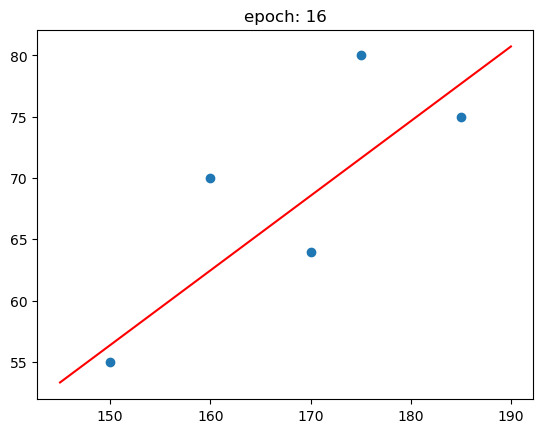

epoch: 17 loss: 31.4557
Weight: 0.6106, Bias: -34.9990


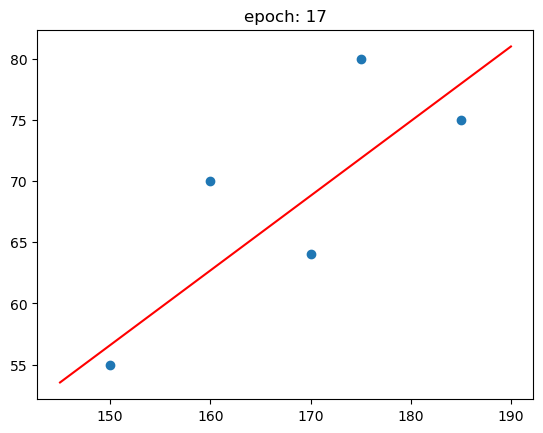

epoch: 18 loss: 30.8226
Weight: 0.6118, Bias: -34.9990


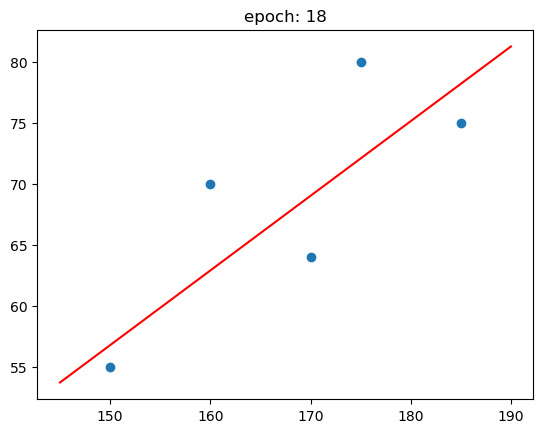

epoch: 19 loss: 30.3866
Weight: 0.6127, Bias: -34.9990


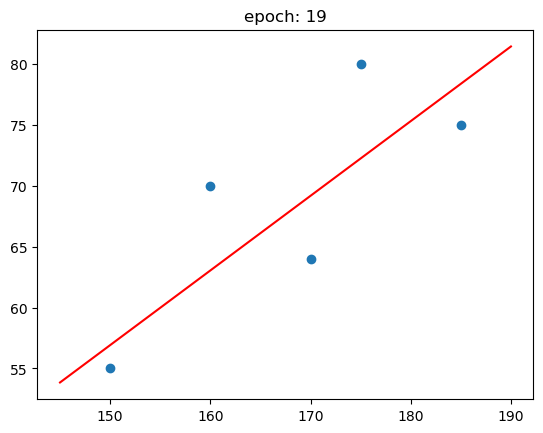

epoch: 20 loss: 30.0865
Weight: 0.6136, Bias: -34.9990


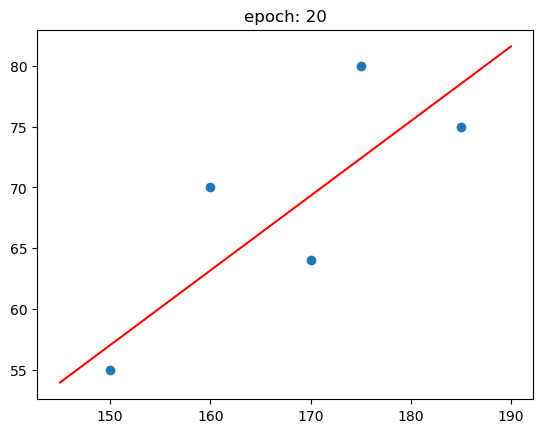

In [28]:
# 모델 파라미터 초기화
a = torch.tensor([0.45], requires_grad=True)
b = torch.tensor([-35.], requires_grad=True)

# 하이퍼 파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []
for ep in range(EPOCH):
    # inference -> 내가 현재 갖고 있는 a. b 를 갖고 y 값 예측
    y_hat = a*x + b
    # loss 계산
    loss = 0
    for n in range(N):
        loss += (y[n] - y_hat[n])**2
    loss = loss/N # MSE
    # update
    loss.backward() # backpropagation
                    # 모든 leaf tensor (a, b) 에 대해서 미분을 진행
                    # a.grad, b.grad 에 현재 loss 값에 대한 미분 값이 들어가있는 것
    with torch.no_grad():
        a -= LR*a.grad
        b -= LR*b.grad  # weight update
    a.grad = torch.tensor([0.]) # gradient 초기화
    b.grad = torch.tensor([0.]) # 다음 위치에서 backward 를 정상적으로 동작시키기 위함
    # print loss
    loss_history.append(loss.item())
    print(f"epoch: {ep+1} loss: {loss.item():.4f}")
    # print weight and bias
    print(f"Weight: {a.item():.4f}, Bias: {b.item():.4f}")
    # plot graph
    x_plot = torch.linspace(145, 190, 100)
    y_plot = a.detach() * x_plot + b.detach()
    plt.figure()
    plt.plot(x,y,'o')
    plt.plot(x_plot, y_plot, 'r')
    plt.title(f"epoch: {ep+1}")
    plt.show()


.grad 초기화 필요한 이유 실험

In [31]:
z = torch.tensor([1.], requires_grad=True)
for _ in range(2):
    loss = z**2
    loss.backward()
    print(z.grad) # -> 반복문 안에서 grad 는 누적됨 , 초기화 필요!!!

tensor([2.])
tensor([4.])


Text(0.5, 1.0, 'Training Loss')

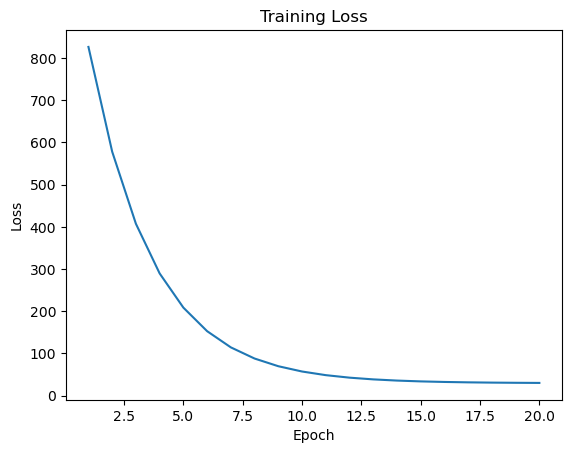

In [32]:
# plot loss_history
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Training Loss")

In [34]:
from torch import nn, optim

epoch: 1 loss: 900.5650
Weight: 0.4780, Bias: -34.9998


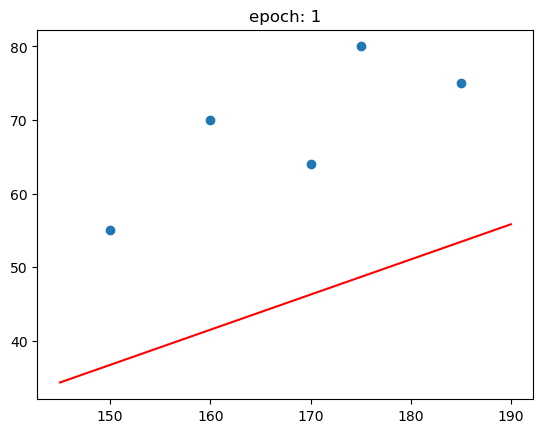

epoch: 2 loss: 660.9294
Weight: 0.5013, Bias: -34.9997


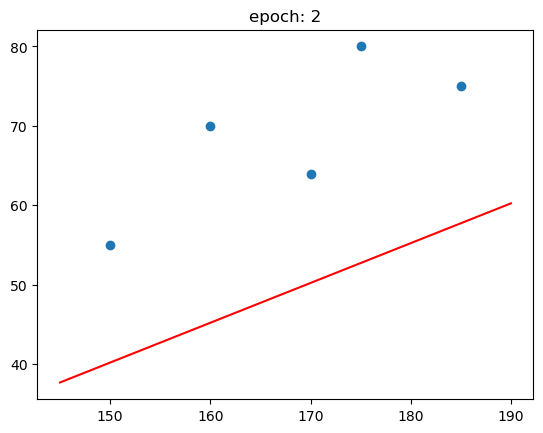

epoch: 3 loss: 495.9343
Weight: 0.5206, Bias: -34.9996


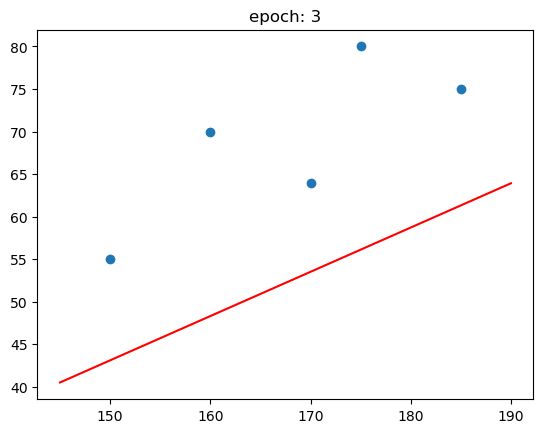

epoch: 4 loss: 382.3307
Weight: 0.5366, Bias: -34.9995


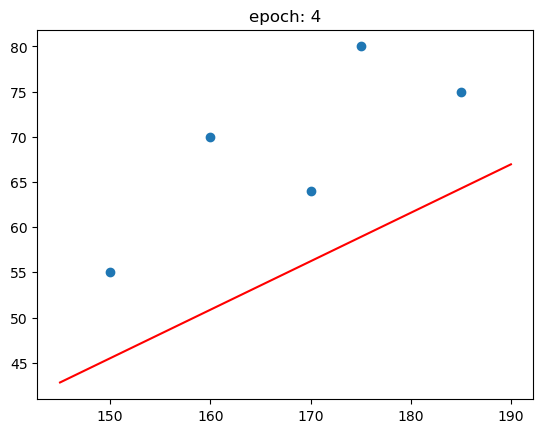

epoch: 5 loss: 304.1121
Weight: 0.5499, Bias: -34.9994


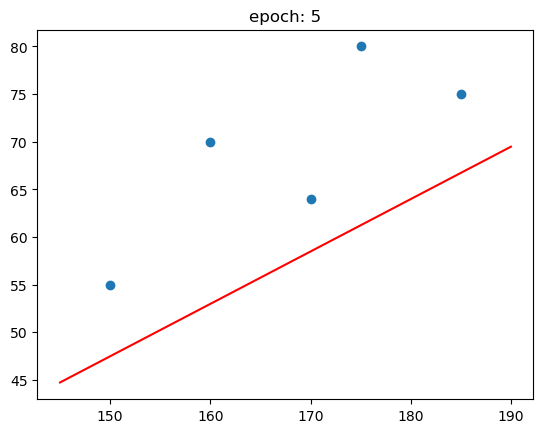

epoch: 6 loss: 250.2566
Weight: 0.5609, Bias: -34.9993


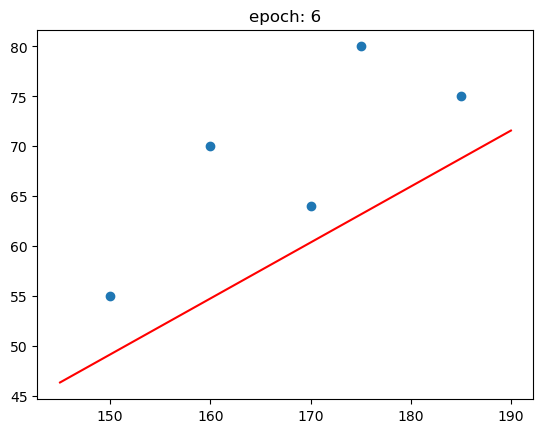

epoch: 7 loss: 213.1756
Weight: 0.5701, Bias: -34.9993


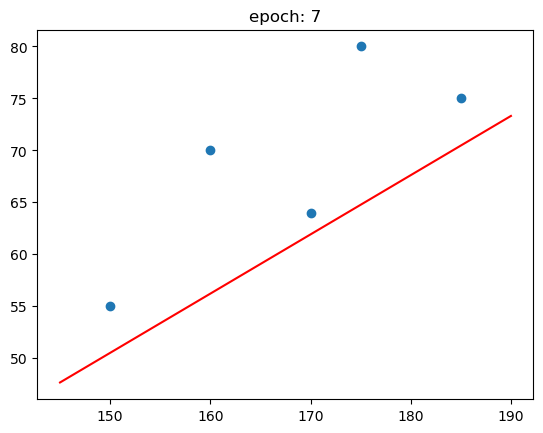

epoch: 8 loss: 187.6445
Weight: 0.5777, Bias: -34.9992


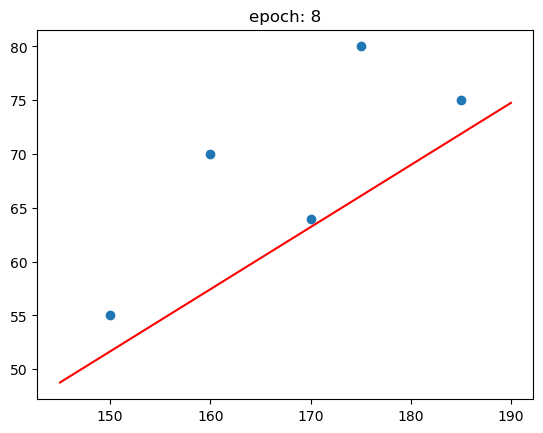

epoch: 9 loss: 170.0657
Weight: 0.5840, Bias: -34.9992


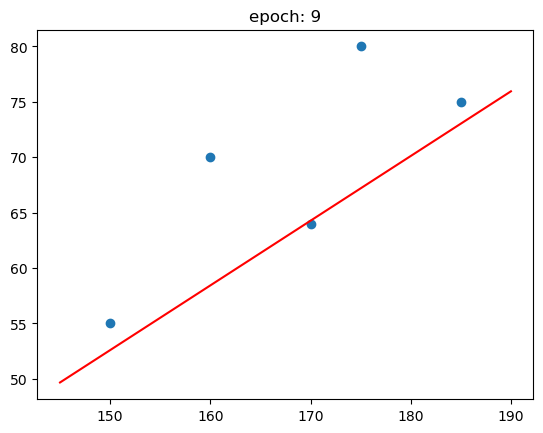

epoch: 10 loss: 157.9622
Weight: 0.5892, Bias: -34.9991


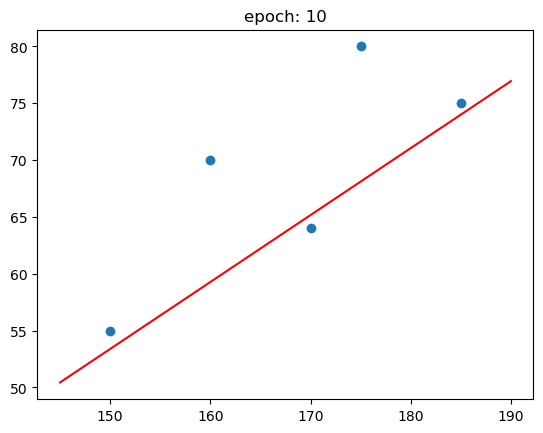

epoch: 11 loss: 149.6288
Weight: 0.5935, Bias: -34.9991


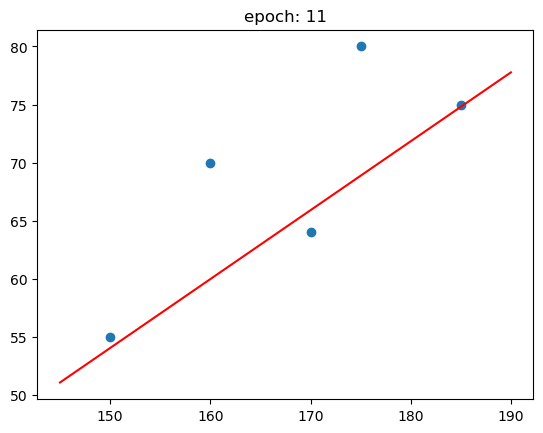

epoch: 12 loss: 143.8909
Weight: 0.5971, Bias: -34.9991


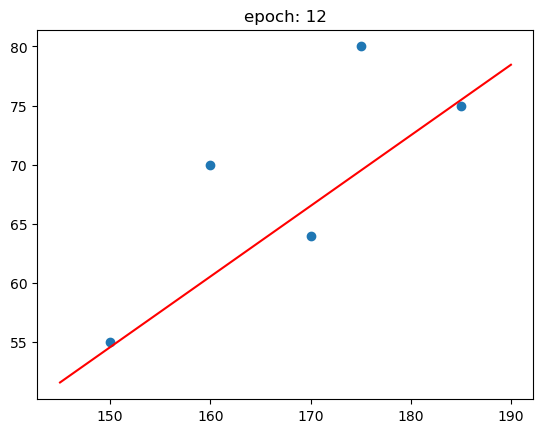

epoch: 13 loss: 139.9402
Weight: 0.6001, Bias: -34.9991


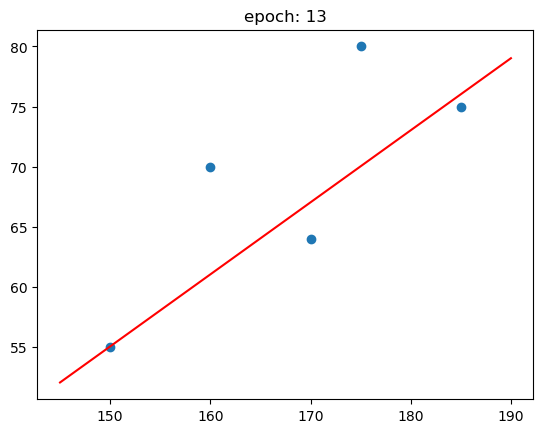

epoch: 14 loss: 137.2202
Weight: 0.6026, Bias: -34.9991


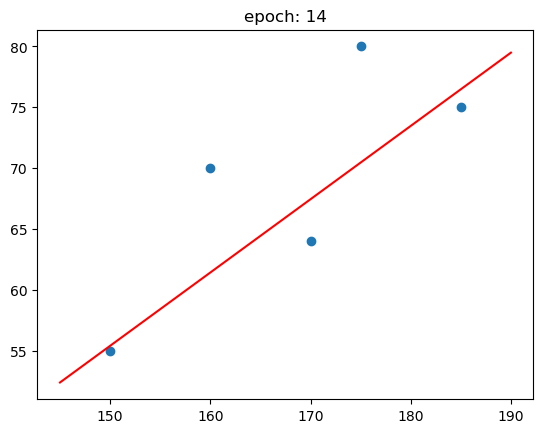

epoch: 15 loss: 135.3472
Weight: 0.6046, Bias: -34.9990


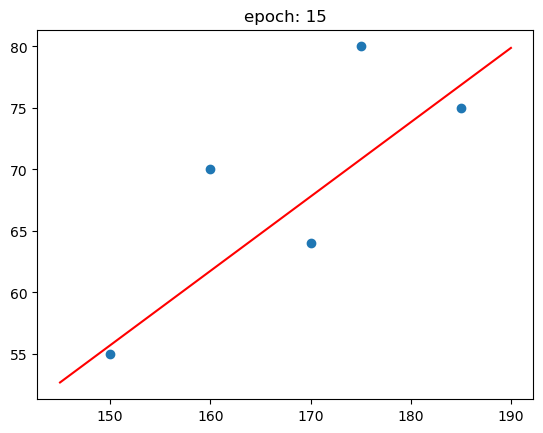

epoch: 16 loss: 134.0578
Weight: 0.6064, Bias: -34.9990


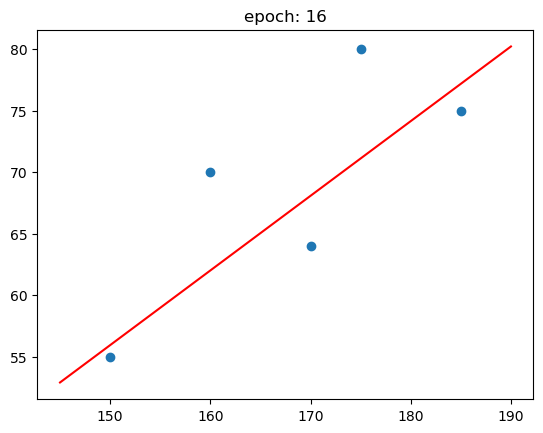

epoch: 17 loss: 133.1698
Weight: 0.6078, Bias: -34.9990


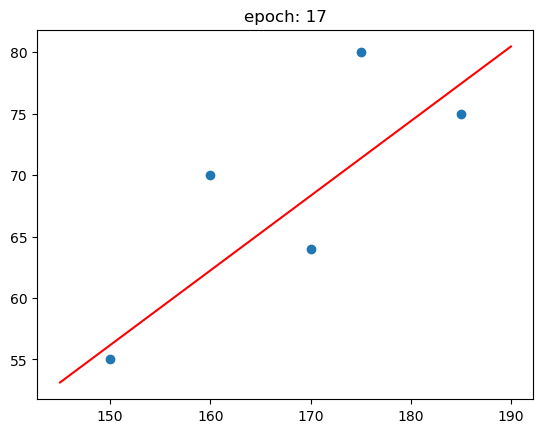

epoch: 18 loss: 132.5586
Weight: 0.6089, Bias: -34.9990


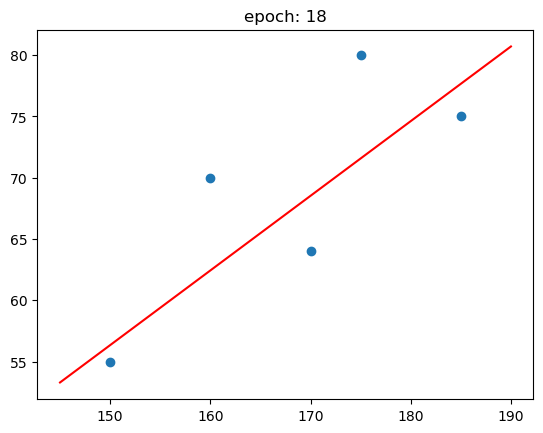

epoch: 19 loss: 132.1376
Weight: 0.6099, Bias: -34.9990


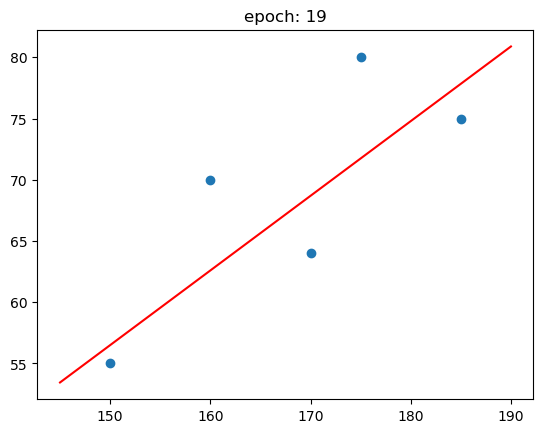

epoch: 20 loss: 131.8478
Weight: 0.6107, Bias: -34.9990


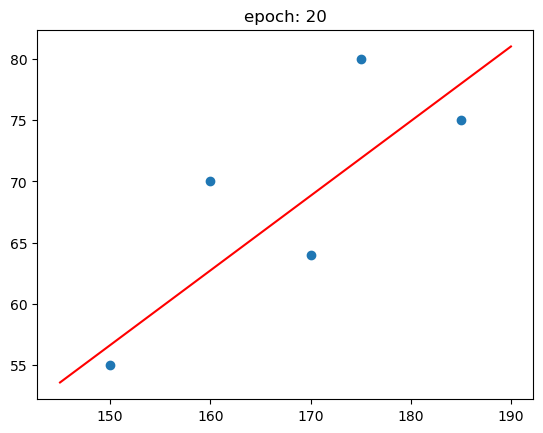

In [38]:
x = x.reshape(-1, 1) # 개체 형태로 바꺼줌

model = nn.Linear(1,1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr=LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
    # inference
    y_hat = model(x)
    # loss
    loss = criterion(y_hat, y)
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    print(f"epoch: {ep+1} loss: {loss.item():.4f}")
    # print weight and bias
    print(f"Weight: {model.weight.data.item():.4f}, Bias: {model.bias.data.item():.4f}")
    # plot graph
    x_plot = torch.linspace(145, 190, 100)
    y_plot = model.weight.squeeze().detach() * x_plot + model.bias.detach()
    plt.figure()
    plt.plot(x,y,'o')
    plt.plot(x_plot, y_plot, 'r')
    plt.title(f"epoch: {ep+1}")
    plt.show()

